# Visualizations Walkthrough

### This script contains the following points:

#### Categorical – Bar Charts
#### Continuous – Histograms, Scatterplots, Line Charts
#### Remainder of Task

In [4]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis'

In [6]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customers_merged.pkl'))

In [7]:
df.head()

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
df.shape

(32089823, 34)

In [9]:
df.columns

Index(['order_id', 'user_id', 'user_order_num', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spending_flag', 'median_dspo', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'STATE', 'Age', 'date_joined',
       'num_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

## Categorical

<AxesSubplot:>

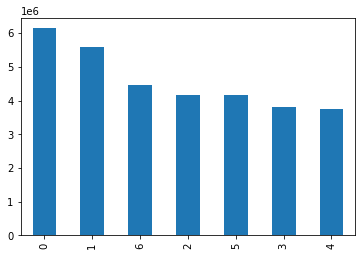

In [10]:
#bar chart
df['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

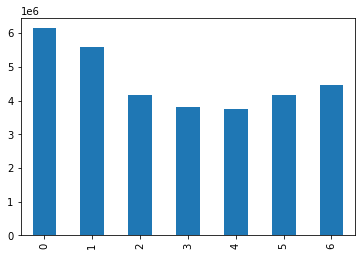

In [11]:
#bar chart but sorted by the index (in order of each day of week)
df['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

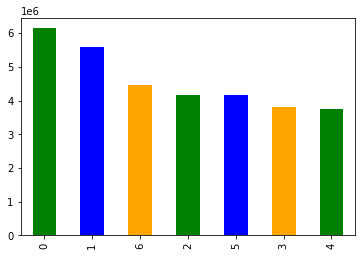

In [12]:
#bar chart with color
df['order_day_of_week'].value_counts().plot.bar(color = ['green','blue','orange'])

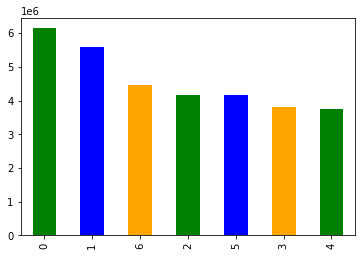

In [13]:
#exporting charts
bar = df['order_day_of_week'].value_counts().plot.bar(color = ['green','blue','orange'])

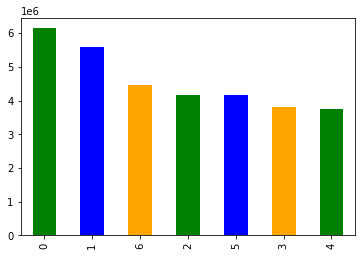

In [14]:
#call the saved chart
bar.figure

In [15]:
#export the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Continuous

<AxesSubplot:ylabel='Frequency'>

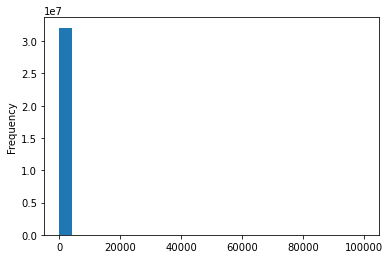

In [16]:
#create a histogram
df['prices'].plot.hist(bins = 25)

In [17]:
#figure out what's wrong
df['prices'].describe()

count    3.208982e+07
mean     1.199255e+01
std      4.968512e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
df['prices'].mean()

11.992553047381335

In [19]:
df['prices'].median()

7.4

In [20]:
df['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

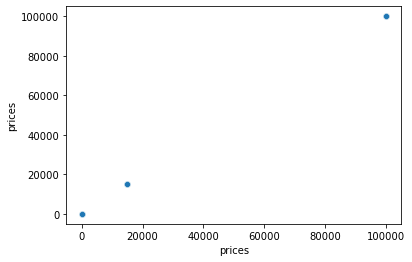

In [21]:
#create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [22]:
df.loc[df['prices'] > 100]

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31989813,3265389,51346,4,1,17,13.0,False,33664,2,1,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
31993838,1179092,131671,12,4,9,15.0,False,33664,1,0,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
31996748,1226705,39667,7,2,15,20.0,False,33664,14,0,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32015756,3000037,95105,2,4,19,22.0,False,33664,4,0,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [23]:
#flag outliers in prices as missing
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [24]:
df['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

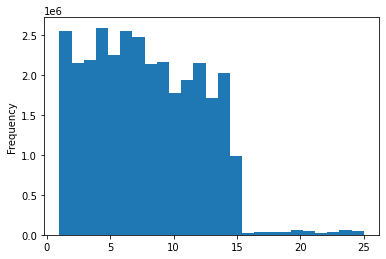

In [25]:
#try histogram again
df['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

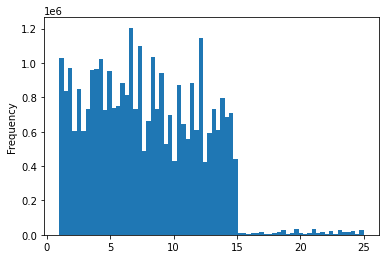

In [26]:
#try it with more bins
df['prices'].plot.hist(bins = 70)

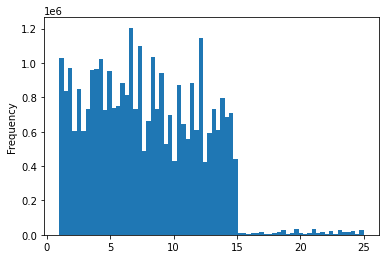

In [27]:
#export histogram
hist = df['prices'].plot.hist(bins = 70)

In [28]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [29]:
#get a sample of the data for line chart
np.random.seed(4)

In [30]:
dev = np.random.rand(len(df)) <= 0.7

In [31]:
big = df[dev]

In [32]:
small = df[~dev]

In [33]:
#check the samples
len(df)

32089823

In [34]:
len(big) + len(small)

32089823

In [35]:
#reduce the samples to just the columns you need
df_2 = small[['order_day_of_week','prices']]

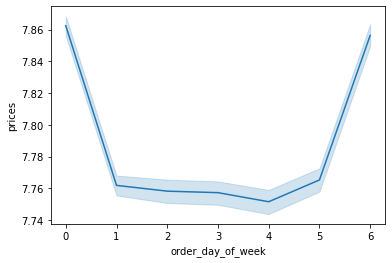

In [36]:
#create a line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

# Remainder of Part 2 of Task

<AxesSubplot:ylabel='Frequency'>

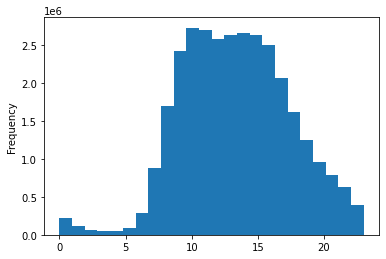

In [37]:
#create a histogram of order_hour_of_day
df['order_hour_of_day'].plot.hist(bins = 24)

Here we can see the busiest times of the day are from 9AM til about 4PM, with 10AM being the busiest hour of the day. The frequency on the y-axis is in millions of sales, so 10AM accounts for around 2.75 million sales. The least busy times of the day are from 1AM to 5AM.

In [38]:
df['order_hour_of_day'].value_counts().sort_index()

0      216093
1      114557
2       68868
3       50785
4       52780
5       87136
6      287817
7      883128
8     1701629
9     2432437
10    2734661
11    2708508
12    2591663
13    2634707
14    2663688
15    2635806
16    2510407
17    2068008
18    1620547
19    1245909
20     966676
21     788478
22     627633
23     397902
Name: order_hour_of_day, dtype: int64

<AxesSubplot:>

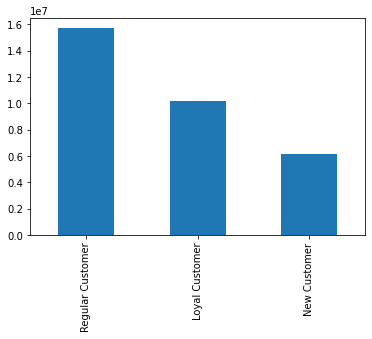

In [39]:
#create a bar chart of loyalty_flag
df['loyalty_flag'].value_counts().plot.bar()

In [40]:
#check for difference in expenditure depending on hour of the day
df_3 = small[['order_hour_of_day','prices']]

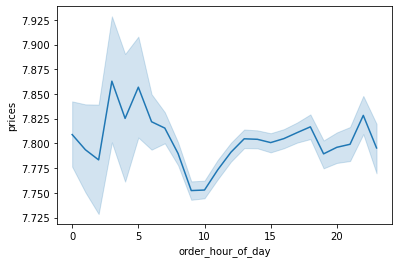

In [41]:
line_1 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [42]:
#create a line chart of age and number of dependents
df_4 = small[['Age','num_dependants']]

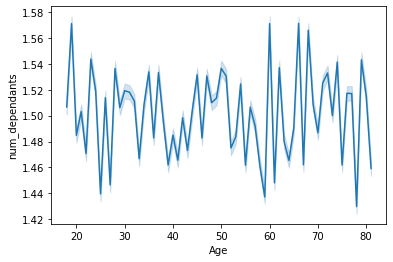

In [43]:
line_2 = sns.lineplot(data = df_4, x = 'Age', y = 'num_dependants')

The line chart above demonstrates the relationship between age and number of dependents. It doesn't really demonstrate any pattern; we could say here that there isn't a relationship between age and number of dependents.

In [44]:
#create a scatterplot of age and income
df_5 = small[['Age','income']]

<AxesSubplot:xlabel='Age', ylabel='income'>

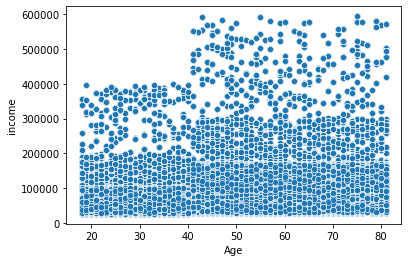

In [45]:
sns.scatterplot(x = 'Age', y = 'income',data = df_5)

The scatterplot above demonstrates the relationship between age and income. We can direct our focus to two areas: the more dense and less dense areas. There are less individuals who are wealthy, and many individuals in the middle to lower class. We see that all of these individuals see a jump in their income at the age of 40. The lense dense area of wealthy individuals get even wealthier, and the middle and lower classes also see a similar jump in spending power once age reaches above 40. There doesn't seem to be any upward trend in income for either group before or after this 40-year-old mark.

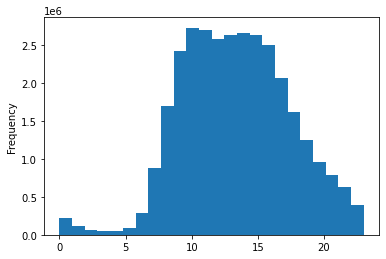

In [46]:
#export visualizations
hist_1 = df['order_hour_of_day'].plot.hist(bins = 24)

In [47]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

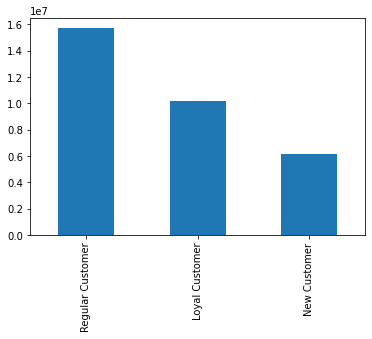

In [48]:
hist_2 = df['loyalty_flag'].value_counts().plot.bar()

In [49]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_loyalty_flag.png'))

In [50]:
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_of_day.png'))

In [51]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_ndep.png'))

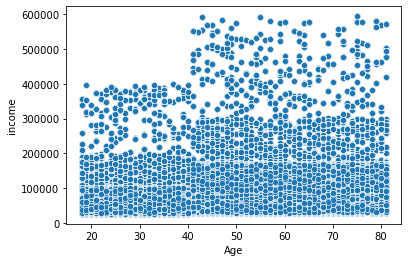

In [52]:
scat_1 = sns.scatterplot(x = 'Age', y = 'income',data = df_5)

In [53]:
scat_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_inc.png'))